In [1]:
from hearing_assistive import *
import numpy as np

%matplotlib inline

# PART 1

In [2]:
clf = init_classifier()

In [3]:
testset = []
size = 2

# add dummy sets of zeros to the testset
for i in range(size):
    dummyset = np.zeros((119, 13))
    testset.append(dummyset)
    
# add dummy sets of ones to the testset
for i in range(size):
    dummyset = np.ones((119, 13))
    testset.append(dummyset)
    
# add dummy sets of negative ones to the testset
for i in range(size):
    dummyset = np.negative(np.ones((119, 13)))
    testset.append(dummyset)
    
# convert to numpy array
testset = np.asarray(testset)
    
# restructure testset before being processed by svm
testset = testset.reshape((testset.shape[0], -1))
print testset.shape

(6, 1547)


In [4]:
clf.predict(testset)

array([0, 0, 1, 1, 2, 2])

In [5]:
targets = np.array([0, 0, 1, 1, 2, 2])
clf.score(testset, targets)

1.0

# PART 2

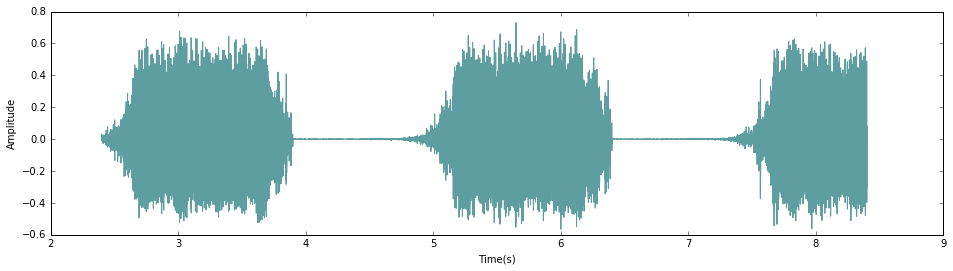

In [6]:
wave = read_wave('Sounds/school_fire_alarm.wav')
target = 3

seg_map = wave.partition()
segment = seg_map[7]
# segment = seg_map[10]
segment.plot()
segment.make_audio()

In [7]:
# initialize dataset and targetset
for i in range(100):
    dataset = []
    targetset = []

    # generate samples with added noise ( default is 100 samples ) and extract mfccs
    dataset, targetset = generate_feature_set(segment, target)
    print i, dataset.shape, targetset.shape

    # restructure dataset before being processed by svm
    dataset = dataset.reshape((dataset.shape[0], -1))

    # fit classifier with dataset and corresponding targetset
    clf.partial_fit(dataset, targetset)

0 (100, 119, 13) (100,)
1 (100, 119, 13) (100,)
2 (100, 119, 13) (100,)
3 (100, 119, 13) (100,)
4 (100, 119, 13) (100,)
5 (100, 119, 13) (100,)
6 (100, 119, 13) (100,)
7 (100, 119, 13) (100,)
8 (100, 119, 13) (100,)
9 (100, 119, 13) (100,)
10 (100, 119, 13) (100,)
11 (100, 119, 13) (100,)
12 (100, 119, 13) (100,)
13 (100, 119, 13) (100,)
14 (100, 119, 13) (100,)
15 (100, 119, 13) (100,)
16 (100, 119, 13) (100,)
17 (100, 119, 13) (100,)
18 (100, 119, 13) (100,)
19 (100, 119, 13) (100,)
20 (100, 119, 13) (100,)
21 (100, 119, 13) (100,)
22 (100, 119, 13) (100,)
23 (100, 119, 13) (100,)
24 (100, 119, 13) (100,)
25 (100, 119, 13) (100,)
26 (100, 119, 13) (100,)
27 (100, 119, 13) (100,)
28 (100, 119, 13) (100,)
29 (100, 119, 13) (100,)
30 (100, 119, 13) (100,)
31 (100, 119, 13) (100,)
32 (100, 119, 13) (100,)
33 (100, 119, 13) (100,)
34 (100, 119, 13) (100,)
35 (100, 119, 13) (100,)
36 (100, 119, 13) (100,)
37 (100, 119, 13) (100,)
38 (100, 119, 13) (100,)
39 (100, 119, 13) (100,)
40 (100, 1

In [8]:
testset = []
size = 2

# add dummy sets of zeros to the testset
for i in range(size):
    dummyset = np.zeros((119, 13))
    testset.append(dummyset)
    
# add dummy sets of ones to the testset
for i in range(size):
    dummyset = np.ones((119, 13))
    testset.append(dummyset)
    
# add dummy sets of negative ones to the testset
for i in range(size):
    dummyset = np.negative(np.ones((119, 13)))
    testset.append(dummyset)
    
# # add alarm sound files to the testset
for i in range(size):
    segment = seg_map[7]
    segment = apply_filter(segment)
    spectrogram = segment.make_spectrogram(seg_length=1764)  # 1764 = 40ms * 44100fps = samples per 40ms
    dummyset = spectrogram.mfcc()   # use default parameter, only include coefficients 2-14 (13 coefficients)
    testset.append(dummyset)
    
# convert to numpy array
testset = np.asarray(testset)
    
# restructure testset before being processed by svm
testset = testset.reshape((testset.shape[0], -1))
print testset.shape

(8, 1547)


In [9]:
print "extected: [0, 0, 1, 1, 2, 2, 3, 3]"
clf.predict(testset)

extected: [0, 0, 1, 1, 2, 2, 3, 3]


array([0, 0, 1, 1, 0, 0, 0, 0])

# PART 3

In [10]:
from sklearn import linear_model, svm

In [11]:
svc = svm.SVC(kernel='rbf', C=100)
sgd = linear_model.SGDClassifier(n_iter=100, alpha=0.01)

In [12]:
dataset = []
targetset = []

for i in range(100):
    # add dummy set of zeros to the dataset
    dummyset = np.zeros((119, 13))
    dataset.append(dummyset)
    targetset.append(0)

    # add dummy set of ones to the dataset
    dummyset = np.ones((119, 13)) 
    dataset.append(dummyset)
    targetset.append(1)

    # add dummy set of negative ones to the dataset
    dummyset = np.negative(np.ones((119, 13)))
    dataset.append(dummyset)
    targetset.append(2)

    segment = seg_map[7]
    segment = apply_filter(segment)
    spectrogram = segment.make_spectrogram(seg_length=1764)  # 1764 = 40ms * 44100fps = samples per 40ms
    dummyset = spectrogram.mfcc()   # use default parameter, only include coefficients 2-14 (13 coefficients)
    dataset.append(dummyset)
    targetset.append(3)

# convert to numpy arrays
dataset = np.asarray(dataset)
targetset = np.asarray(targetset)

# restructure dataset before being processed by svm
dataset = dataset.reshape((dataset.shape[0], -1))

print dataset.shape

(400, 1547)


In [13]:
svc.fit(dataset, targetset)
sgd.fit(dataset, targetset)

SGDClassifier(alpha=0.01, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=100, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

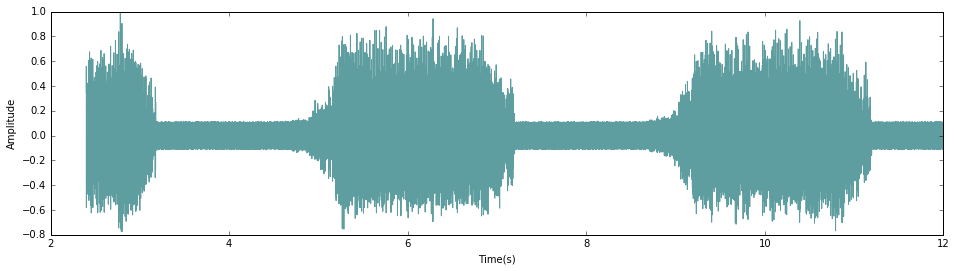

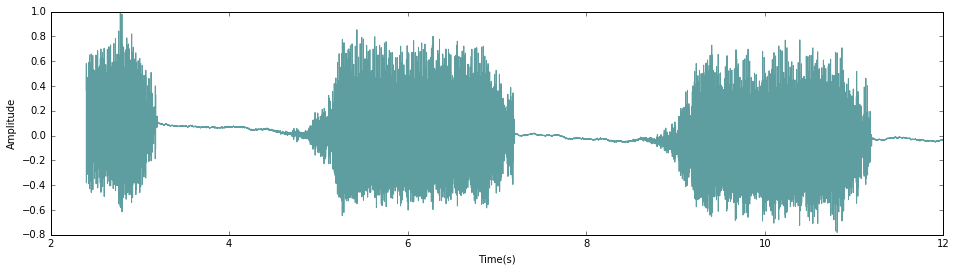

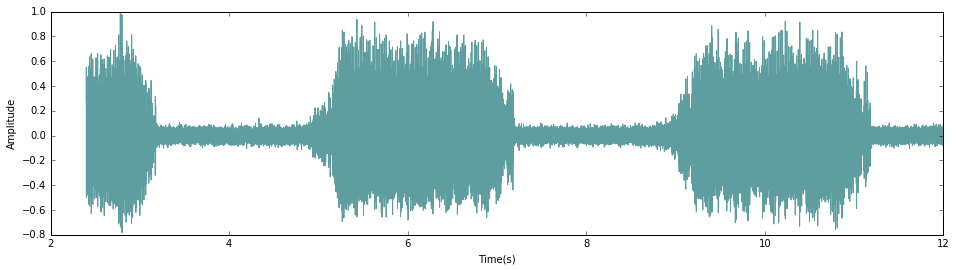

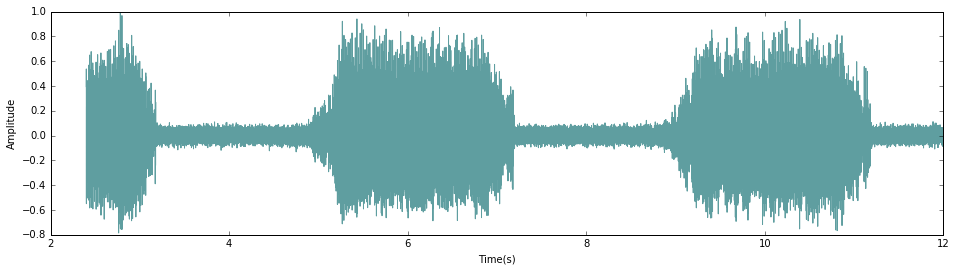

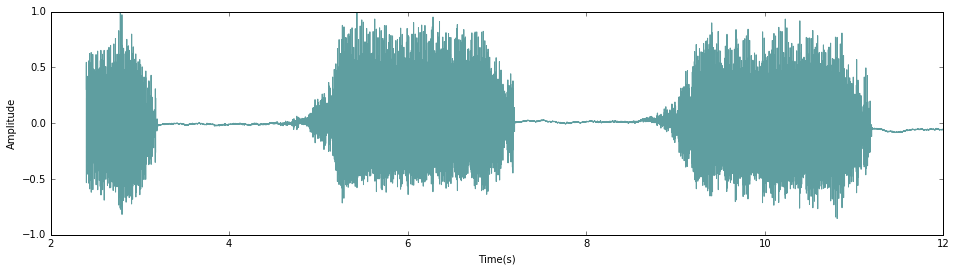

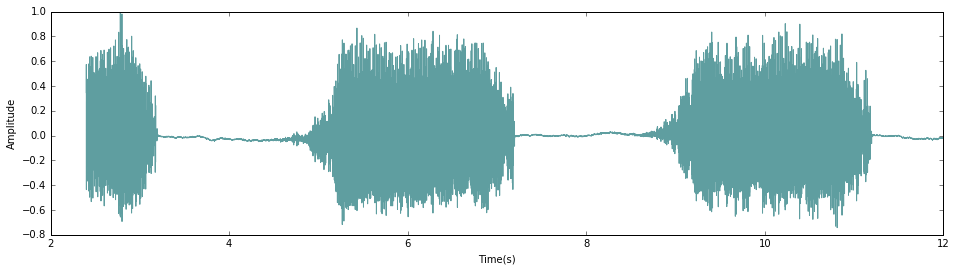

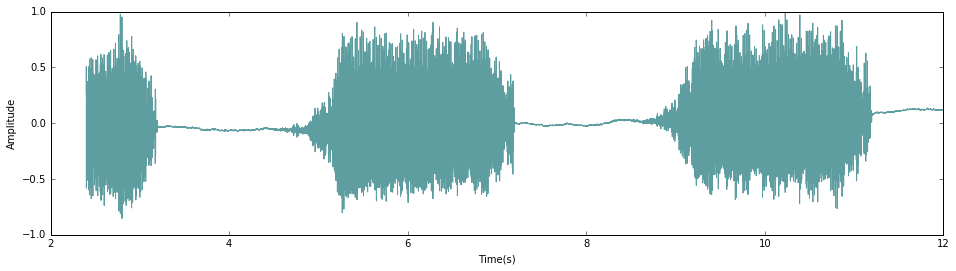

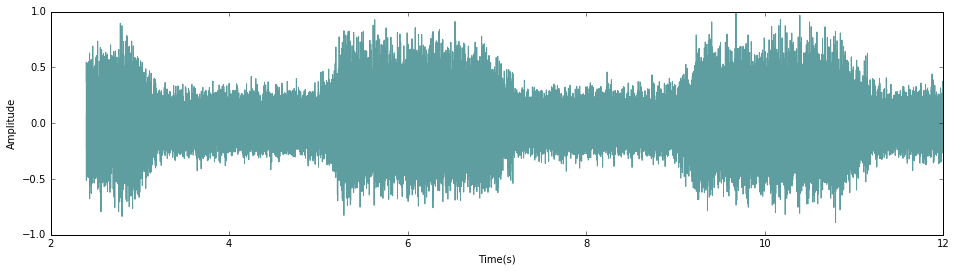

(14, 1547)


In [14]:
testset = []
size = 2

# add dummy sets of zeros to the testset
for i in range(size):
    dummyset = np.zeros((119, 13))
    testset.append(dummyset)
    
# add dummy sets of ones to the testset
for i in range(size):
    dummyset = np.ones((119, 13))
    testset.append(dummyset)
    
# add dummy sets of negative ones to the testset
for i in range(size):
    dummyset = np.negative(np.ones((119, 13)))
    testset.append(dummyset)
    
# # add alarm sound files to the testset
for i in range(size*4):
    segment = seg_map[10]
    segment = apply_filter(segment)
    segment.plot()
    spectrogram = segment.make_spectrogram(seg_length=1764)  # 1764 = 40ms * 44100fps = samples per 40ms
    dummyset = spectrogram.mfcc()   # use default parameter, only include coefficients 2-14 (13 coefficients)
    testset.append(dummyset)
    
# convert to numpy array
testset = np.asarray(testset)
    
# restructure testset before being processed by svm
testset = testset.reshape((testset.shape[0], -1))
print testset.shape

In [15]:
print "extected: [0, 0, 1, 1, 2, 2, 3, 3]"
print svc.predict(testset)
print sgd.predict(testset)

extected: [0, 0, 1, 1, 2, 2, 3, 3]
[0 0 1 1 2 2 3 3 3 3 3 3 3 3]
[0 0 1 1 2 2 3 3 3 3 3 3 3 2]
